# Optimized energy scenarios Giudicarie Esteriori

Created by [Michele Urbani](mailto:murbani@fbk.eu).

In this notebook, we replicate the study in {cite:ps}`MAHBUB2016236`.

## Problem description

### Decision variables

The decision variables are:

1. **PV capacity**: the amount of installed PV capacity is 5 MW and it is
as the lower bound for the variable, whereas the calculated maximum PV capacity
is 42 MW, which is the upper bound.
2. **Heat production technologies**: individual wood, oil, LPG boilers, and
gound source heat pumps are decision variables expressed as percentages of the
total.
3. **Wood organic ranking cycle micro cogeneration** provides both thermal and
electrical power

### Constraints

The are two constraints: the first concerns the variables at points 2 and 3 of
the list above, which must sum to 1. The second constraints limits the total
wood consumption to be less than 57 GWh/year.

### Optimization objectives

There are four optimization objectives.

1. **CO$_2$ minimization**: the value of produced CO$_2$ is
``CO2-emission (corrected)`` in EnergyPLAN output.
2. **Annual cost minimization**: the annual cost is the sum of the annual
investment cost, variable operational and maintenance (O&M) cost, fixed
operational and maintenacne cost, and the variable O&M and fixed O&M costs.
3. **Load following capacity (LFC) minimization**: the LFC expresses how much
electricity production follows electrivity demand over a period (yearly in this
case).
4. **Energy system dependency (ESD) minimization** concerns the reduction of
foreign energy import.

## Problem declaration

The ``_evaluate`` method is analyzed in the following.

In [1]:
from moea.models import get_model
from moea.algorithms import get_algorithm

model_name = 'Giudicarie'
algorithm_name = 'nsga-ii'

model = get_model(model_name)
algorithm = get_algorithm(algorithm_name, pop_size=100)

2025-08-05 11:30:46.109 | INFO     | moea.config:<module>:11 - PROJ_ROOT path is: C:\Users\murbani\moea


In [ ]:
from pymoo.optimize import minimize

res = minimize(
    model,
    algorithm,
    ('n_gen', 20),
    seed=1234,
    verbose=True,
)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      3 |  0.000000E+00 |  2.858730E+01 |             - |             -
     2 |      200 |      4 |  0.000000E+00 |  1.649660E+01 |  0.3552624049 |         ideal
     3 |      300 |      9 |  0.000000E+00 |  1.146360E+01 |  0.0961991400 |         ideal
     4 |      400 |     12 |  0.000000E+00 |  8.1340000000 |  0.0484775694 |             f
     5 |      500 |     16 |  0.000000E+00 |  6.3120000000 |  0.0890224284 |             f
     6 |      600 |     20 |  0.000000E+00 |  4.9813000000 |  0.0483322873 |             f
     7 |      700 |     22 |  0.000000E+00 |  3.5060000000 |  0.0378091828 |             f
     8 |      800 |     25 |  0.000000E+00 |  2.1549000000 |  0.0384412607 |             f
     9 |      900 |     29 |  0.000000E+00 |  1.3603000000 |  0.1375484273 |         ideal
    10 |     1000 |     32 |  0.000000E+00 |  0.7752000000 |  0.1191417999 |         nadir

## Results analysis

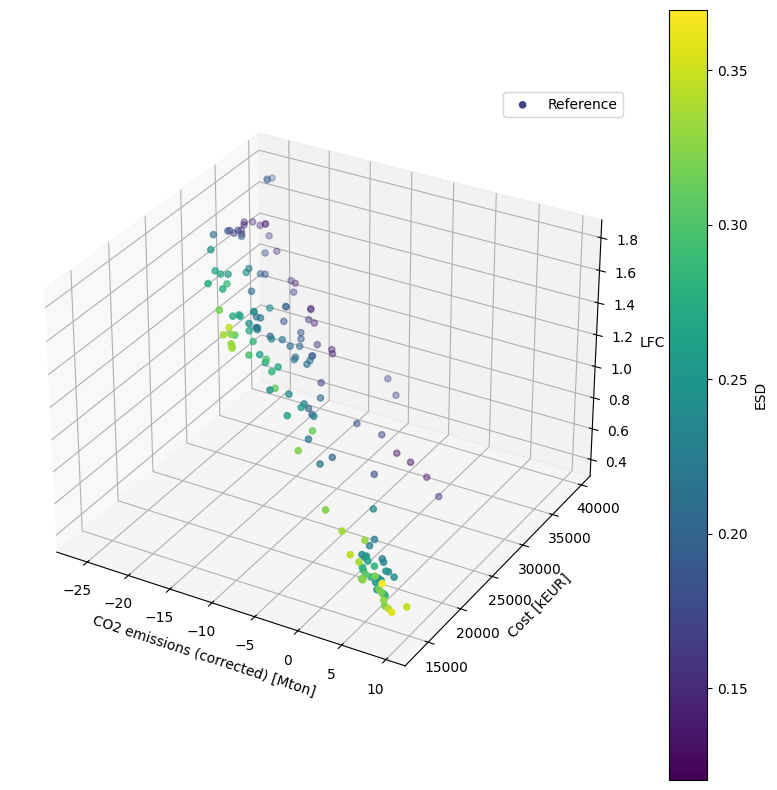

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load reference data from the paper, no index column and space separated
ref = pd.read_csv('giudicarie-reference.csv', sep=' ', header=None,
                  names=['CO2 emissions (corrected) [Mton]', 'Cost [kEUR]',
                         'LFC', 'ESD'],
                  index_col=False)

# 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to set the marker colors
sc = ax.scatter(
    ref['CO2 emissions (corrected) [Mton]'],
    ref['Cost [kEUR]'],
    ref['LFC'],
    c=ref['ESD'],
    cmap='viridis',
    label='Reference'
)

# Add color bar which maps the colors to the ESD values
cbar = fig.colorbar(sc)
cbar.set_label('ESD')

ax.set_xlabel('CO2 emissions (corrected) [Mton]')
ax.set_ylabel('Cost [kEUR]')
ax.set_zlabel('LFC')
plt.legend()
plt.show()


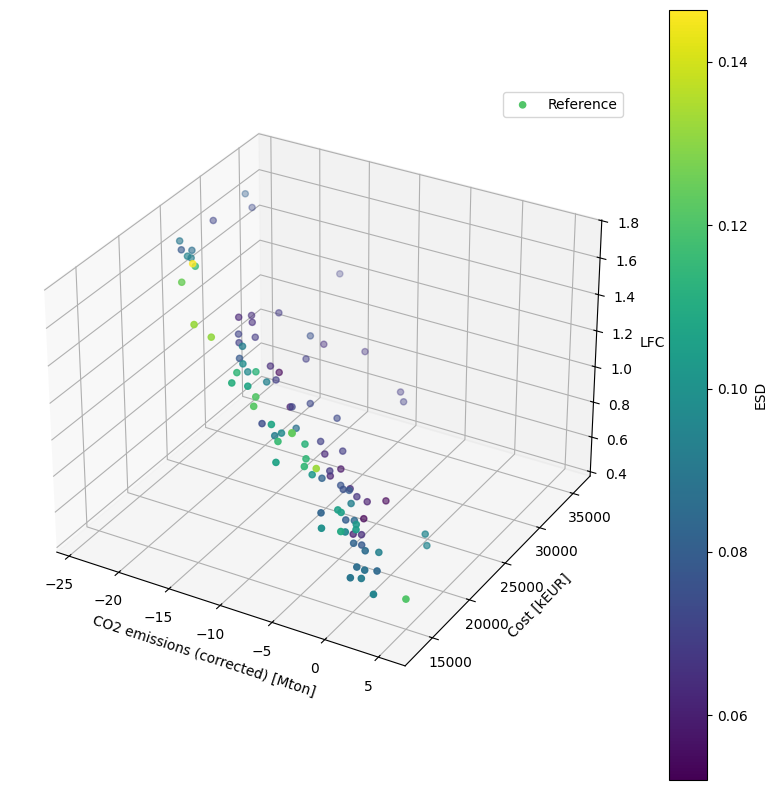

In [ ]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Cast results to DataFrame
df = pd.DataFrame(
    res.F,
    columns=[
        'CO2 emissions (corrected) [Mton]',
        'Cost [kEUR]',
        'LFC',
        'ESD'
    ]
)

# Use a colormap to set the marker colors
sc = ax.scatter(
    df['CO2 emissions (corrected) [Mton]'],
    df['Cost [kEUR]'],
    df['LFC'],
    c=df['ESD'],
    cmap='viridis',
    label='Reference'
)

# Add color bar which maps the colors to the ESD values
cbar = fig.colorbar(sc)
cbar.set_label('ESD')

ax.set_xlabel('CO2 emissions (corrected) [Mton]')
ax.set_ylabel('Cost [kEUR]')
ax.set_zlabel('LFC')
plt.legend()
plt.show()


### Convergence analysis

The results of the paper {cite:t}`MAHBUB2016140` are used as reference to
measure the quality of the solution. We implement the Inverted Generational
Distance (IGD) {cite:t}`COELLOCOELLO2004688` to quantify the distance from any
point in the set of solutions $Z$ to the closest point in the set of
reference solutions $A$.

$$
IGD(A) = \frac{1}{|Z|} \left( \sum_{i=1}^{|Z|} \hat{d}_i ^{\,p} \right) ^{1/p}
$$

where $\hat{d}_i$ represents the Euclidean distance ($p=2$) from $z_i$ to its
nearest reference point in $A$.

The lower the value of the IGD, the closer the set $A$ to the reference set
$Z$.

In [ ]:
from pymoo.indicators.igd import IGD

ind = IGD(ref.values)
print("IGD", ind(res.F))

IGD 281.20622479628685


## References

```{bibliography}
:style: unsrt
```